Import librariess & define nnApproximation

In [1]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt

dtype = torch.float
device = torch.device("cpu")
#device = torch.device("cuda:0") # GPU에서 실행하려면 이 주석을 제거하세요

class nnApproximation(nn.Module):
    def __init__(self, input_dim):
        super(nnApproximation, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 32),
            nn.ReLU(),
            nn.Linear(32, input_dim+1)
        )
    def forward(self, x):
        return self.layers(x)
print("class created")

class created


Hyperparameters & Samples

In [2]:
learning_rate = 0.00001
num_epochs = 1000
num_samples = 100
test_samples = 1000

Define models

In [3]:
# Define models
m4=nnApproximation(4)
m8=nnApproximation(8)
m16=nnApproximation(16)
m32=nnApproximation(32)

# Define the loss function and optimizer
loss_function = nn.L1Loss()

op4 = torch.optim.Adam(m4.parameters(), lr=learning_rate)
op8 = torch.optim.Adam(m8.parameters(), lr=learning_rate)
op16 = torch.optim.Adam(m16.parameters(), lr=learning_rate)
op32 = torch.optim.Adam(m32.parameters(), lr=learning_rate)

print("model created")

model created


Training(generate random inputs per epoch)

In [4]:
# Training loop for param4
print("starting training model with 4 params")
loss4list=list()
for epoch in range(num_epochs):
    # Generate random input
    X = torch.rand(num_samples, 4).to(device)*10
    current_loss = 0.0
    for t in range(num_samples):
        Xs=X[t]
        op4.zero_grad()
        pred=m4(Xs)
        if torch.isnan(pred).any():
            print("nan detected")
        log_sum = torch.log(torch.sum(Xs))
        log_individual = torch.sum(torch.log(Xs) * pred[:-1])
        log_constant = pred[-1]
        loss = loss_function(torch.pow(torch.abs(log_sum - log_individual - log_constant), 2), torch.zeros(4))
        loss.backward()
        op4.step()
        current_loss += loss.item()
        if t % 10 == 0:
            #print('Loss after mini-batch %5d: %.3f' %
            #      (t + 1, current_loss / 500))
            loss4list.append(current_loss)
            current_loss = 0.0
print(len(loss4list))

starting training model with 4 params
10000


d:\cloudservices\dropbox\dropbox\2023-1-lastchance\pgm\prj\pretrain\venv\lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


In [5]:
# Training loop for param4
print("starting training model with 8 params")
loss8list=list()
for epoch in range(num_epochs):
    X = torch.rand(num_samples, 8).to(device)*10
    # Generate random input
    current_loss = 0.0
    for t in range(num_samples):
        Xs=X[t]
        op8.zero_grad()
        pred=m8(Xs)
        if torch.isnan(pred).any():
            print("nan detected")
        log_sum = torch.log(torch.sum(Xs))
        log_individual = torch.sum(torch.log(Xs) * pred[:-1])
        log_constant = pred[-1]
        loss = loss_function(torch.pow(torch.abs(log_sum - log_individual - log_constant), 2), torch.zeros(4))
        loss.backward()
        op8.step()
        current_loss += loss.item()
        if t % 10 == 0:
            #print('Loss after mini-batch %5d: %.3f' %
            #      (t + 1, current_loss / 500))
            loss8list.append(current_loss)
            current_loss = 0.0
print(len(loss8list))

starting training model with 8 params
10000


In [6]:
# Training loop for param4
print("starting training model with 16 params")
loss16list=list()
for epoch in range(num_epochs):
    X = torch.rand(num_samples, 16).to(device)*10
    # Generate random input
    current_loss = 0.0
    for t in range(num_samples):
        Xs=X[t]
        op16.zero_grad()
        pred=m16(Xs)
        if torch.isnan(pred).any():
            print("nan detected")
        log_sum = torch.log(torch.sum(Xs))
        log_individual = torch.sum(torch.log(Xs) * pred[:-1])
        log_constant = pred[-1]
        loss = loss_function(torch.pow(torch.abs(log_sum - log_individual - log_constant), 2), torch.zeros(4))
        loss.backward()
        op16.step()
        current_loss += loss.item()
        if t % 10 == 0:
            #print('Loss after mini-batch %5d: %.3f' %
            #      (t + 1, current_loss / 500))
            loss16list.append(current_loss)
            current_loss = 0.0
print(len(loss16list))

starting training model with 16 params
10000


In [7]:
# Training loop for param4
print("starting training model with 32 params")
loss32list=list()
for epoch in range(num_epochs):
    # Generate random input
    X = torch.rand(num_samples, 32).to(device)*10
    current_loss = 0.0
    for t in range(num_samples):
        Xs=X[t]
        op32.zero_grad()
        pred=m32(Xs)
        if torch.isnan(pred).any():
            print("nan detected")
        log_sum = torch.log(torch.sum(Xs))
        log_individual = torch.sum(torch.log(Xs) * pred[:-1])
        log_constant = pred[-1]
        loss = loss_function(torch.pow(torch.abs(log_sum - log_individual - log_constant), 2), torch.zeros(4))
        loss.backward()
        op32.step()
        current_loss += loss.item()
        if t % 10 == 0:
            #print('Loss after mini-batch %5d: %.3f' %
            #      (t + 1, current_loss / 500))
            loss32list.append(current_loss)
            current_loss = 0.0
print(len(loss32list))

starting training model with 32 params
10000


Plot data from m4 model

tensor([2.6097, 2.2165, 3.2969, 3.0615, 3.2193, 2.7318, 3.0327, 2.7805, 3.0215,
        2.3655, 3.3073, 3.1111, 3.2362, 3.2249, 3.0330, 3.3617, 2.9803, 2.4290,
        3.1708, 3.0203, 2.9642, 2.6594, 3.3366, 2.9131, 2.8522, 2.8452, 2.7317,
        3.0125, 3.3905, 3.0422, 2.8488, 2.9912, 2.3903, 2.6184, 2.4310, 2.9925,
        2.8279, 2.8076, 2.5885, 3.0432, 2.1489, 2.8981, 3.2264, 2.6193, 2.3147,
        2.3976, 2.9485, 2.4095, 3.1327, 2.6261, 3.1921, 2.4836, 3.2056, 3.0064,
        3.0238, 3.0249, 2.7724, 3.2952, 2.6942, 2.7146, 2.7883, 3.2058, 3.2857,
        3.1948, 3.4935, 3.1369, 2.6904, 2.4357, 2.5199, 2.4806, 2.5862, 2.6365,
        2.9062, 2.8562, 2.3238, 3.1708, 2.9561, 2.0952, 2.6421, 3.0366, 2.8361,
        2.3103, 3.2890, 2.9525, 3.3468, 3.3265, 2.8398, 3.1684, 2.9901, 1.3917,
        2.9073, 2.9507, 3.3654, 2.7841, 2.3562, 3.3287, 3.0329, 2.2740, 3.1331,
        2.9486, 2.6699, 3.1679, 3.0533, 3.3452, 3.0446, 3.3663, 2.9399, 3.2436,
        3.1619, 3.2077, 3.0918, 3.1496, 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


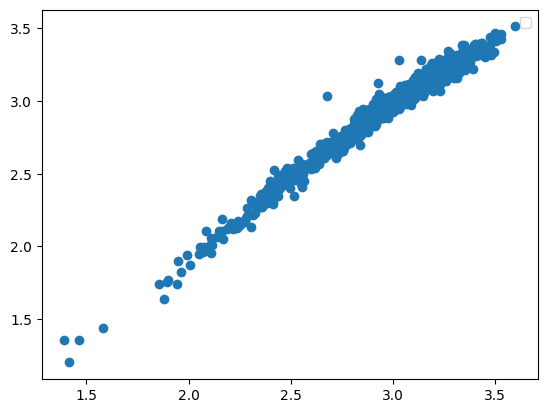

In [8]:
X_test = torch.rand(test_samples,4).to(device)*10
with torch.no_grad():
    Y_pred = m4(X_test)
    LHS=list()
    RHS=list()
    for t in range(test_samples):
        LHS.append(torch.log(torch.sum(X_test[t])))
        RHS.append(torch.sum(torch.log(X_test[t])*Y_pred[t][:-1]) + Y_pred[t][-1])
    LHS=torch.tensor(LHS)
    RHS=torch.tensor(RHS)
    print(LHS)
    print(RHS)
    #plt.plot(X_test.numpy(), LHS.numpy(),color='r',label='LHS')
    #plt.plot(X_test.numpy(), RHS.numpy(),color='r',label='LHS')
    plt.scatter(LHS.numpy(),RHS.numpy())
    plt.legend()
    plt.show()

Save model

In [9]:
torch.jit.script(m4).save('m4.pt')
torch.jit.script(m8).save('m8.pt')
torch.jit.script(m16).save('m16.pt')
torch.jit.script(m32).save('m32.pt')


